In [2]:
import os
import ast
import cv2
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from pycocotools import mask as maskUtils

In [3]:
dataset_path = "./dataset"
img_path = os.path.join(dataset_path, "images")
annot_path = os.path.join(dataset_path, "annotation")
captions_path = os.path.join(annot_path, "captions_val2017.json")
instances_path = os.path.join(annot_path, "instances_val2017.json")
person_path = os.path.join(annot_path, "person_keypoints_val2017.json")
stuff_path = os.path.join(annot_path, "stuff_val2017.json")

In [4]:
for i in glob.glob(os.path.join(img_path, "*.jpg")):
    print(i)

./dataset/images/000000000139.jpg


In [5]:
import json

with open(captions_path, 'r') as file:
    capt_json = json.load(file)
with open(instances_path, 'r') as file:
    inst_json = json.load(file)
with open(person_path, 'r') as file:
    pers_json = json.load(file)
with open(stuff_path, 'r') as file:
    stuf_json = json.load(file)

In [6]:
capt_json.keys(), inst_json.keys(), pers_json.keys(), stuf_json.keys()

(dict_keys(['info', 'licenses', 'images', 'annotations']),
 dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']),
 dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']),
 dict_keys(['info', 'images', 'licenses', 'categories', 'annotations']))

In [7]:
capt_json['images'][0].keys(), capt_json['annotations'][0].keys()

(dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 dict_keys(['image_id', 'id', 'caption']))

In [8]:
inst_json['images'][0].keys(), inst_json['annotations'][0].keys(), inst_json['categories'][0].keys()

(dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']),
 dict_keys(['supercategory', 'id', 'name']))

In [9]:
pers_json['images'][0].keys(), pers_json['annotations'][0].keys(), pers_json['categories'][0].keys()

(dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id']),
 dict_keys(['supercategory', 'id', 'name', 'keypoints', 'skeleton']))

In [10]:
stuf_json['images'][0].keys(), stuf_json['annotations'][0].keys(), stuf_json['categories'][0].keys()

(dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']),
 dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']),
 dict_keys(['supercategory', 'id', 'name']))

In [11]:
import pandas as pd

df_capt_images = pd.DataFrame(capt_json['images'], columns=['file_name', 'height', 'width', 'id'])
df_capt_annota = pd.DataFrame(capt_json['annotations'])

In [12]:
df_inst_images = pd.DataFrame(inst_json['images'], columns=['file_name', 'height', 'width', 'id'])
df_inst_annota = pd.DataFrame(inst_json['annotations'])
df_inst_catego = pd.DataFrame(inst_json['categories'])

In [13]:
df_pers_images = pd.DataFrame(pers_json['images'], columns=['file_name', 'height', 'width', 'id'])
df_pers_annota = pd.DataFrame(pers_json['annotations'])
df_pers_catego = pd.DataFrame(pers_json['categories'])

In [14]:
df_stuf_images = pd.DataFrame(stuf_json['images'], columns=['file_name', 'height', 'width', 'id'])
df_stuf_annota = pd.DataFrame(stuf_json['annotations'])
df_stuf_catego = pd.DataFrame(stuf_json['categories'])

In [15]:
pd.merge(df_capt_images, df_capt_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').drop(columns=["id_y", "id_x"])

,file_name,height,width,image_id,caption
0,000000397133.jpg,427,640,397133,A man is in a kitchen making pizzas.
1,000000397133.jpg,427,640,397133,Man in apron standing on front of oven with pa...
2,000000397133.jpg,427,640,397133,A baker is working in the kitchen rolling dough.
3,000000397133.jpg,427,640,397133,A person standing by a stove in a kitchen.
4,000000397133.jpg,427,640,397133,A table with pies being made and a person stan...
...,...,...,...,...,...
25009,000000015335.jpg,480,640,15335,A group of people sitting at a table with food.
25010,000000015335.jpg,480,640,15335,"A man, woman, and boy are sitting at a table."
25011,000000015335.jpg,480,640,15335,"A man, woman and child eating together at a re..."
25012,000000015335.jpg,480,640,15335,A boy sitting between a man and a woman.


In [16]:
pd.merge(df_inst_images, df_inst_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').drop(columns=["id_y", "id_x"])

,file_name,height,width,segmentation,area,iscrowd,image_id,bbox,category_id
0,000000397133.jpg,427,640,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....",1481.38065,0,397133,"[217.62, 240.54, 38.99, 57.75]",44
1,000000397133.jpg,427,640,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...",54085.62170,0,397133,"[1.0, 240.24, 346.63, 186.76]",67
2,000000397133.jpg,427,640,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",17376.91885,0,397133,"[388.66, 69.92, 109.41, 277.62]",1
3,000000397133.jpg,427,640,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...",123.19340,0,397133,"[135.57, 249.43, 22.32, 28.79]",49
4,000000397133.jpg,427,640,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...",2136.46615,0,397133,"[31.28, 344.0, 68.12, 40.83]",51
...,...,...,...,...,...,...,...,...,...
36776,000000015335.jpg,480,640,"[[168.32, 151.37, 165.88, 141.01, 161.61, 133....",5697.13675,0,15335,"[160.39, 66.68, 77.99, 84.69]",1
36777,000000015335.jpg,480,640,"[[640.0, 425.34, 634.94, 424.12, 623.96, 422.9...",2162.51280,0,15335,"[599.96, 422.9, 40.04, 57.1]",47
36778,000000015335.jpg,480,640,"[[26.58, 318.6, 47.35, 323.29, 46.01, 315.92, ...",380.79115,0,15335,"[2.47, 306.54, 44.88, 16.75]",77
36779,000000015335.jpg,480,640,"[[362.44, 128.22, 364.36, 119.75, 366.28, 115....",453.39980,0,15335,"[362.44, 102.44, 24.23, 27.7]",1


In [17]:
df_inst_images.merge(df_inst_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').merge(df_inst_catego, left_on="category_id", right_on="id", how="inner", validate='many_to_many').drop(columns=['id_x', 'id_y', 'id'])

,file_name,height,width,segmentation,area,iscrowd,image_id,bbox,category_id,supercategory,name
0,000000397133.jpg,427,640,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....",1481.38065,0,397133,"[217.62, 240.54, 38.99, 57.75]",44,kitchen,bottle
1,000000397133.jpg,427,640,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...",54085.62170,0,397133,"[1.0, 240.24, 346.63, 186.76]",67,furniture,dining table
2,000000397133.jpg,427,640,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",17376.91885,0,397133,"[388.66, 69.92, 109.41, 277.62]",1,person,person
3,000000397133.jpg,427,640,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...",123.19340,0,397133,"[135.57, 249.43, 22.32, 28.79]",49,kitchen,knife
4,000000397133.jpg,427,640,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...",2136.46615,0,397133,"[31.28, 344.0, 68.12, 40.83]",51,kitchen,bowl
...,...,...,...,...,...,...,...,...,...,...,...
36776,000000015335.jpg,480,640,"[[168.32, 151.37, 165.88, 141.01, 161.61, 133....",5697.13675,0,15335,"[160.39, 66.68, 77.99, 84.69]",1,person,person
36777,000000015335.jpg,480,640,"[[640.0, 425.34, 634.94, 424.12, 623.96, 422.9...",2162.51280,0,15335,"[599.96, 422.9, 40.04, 57.1]",47,kitchen,cup
36778,000000015335.jpg,480,640,"[[26.58, 318.6, 47.35, 323.29, 46.01, 315.92, ...",380.79115,0,15335,"[2.47, 306.54, 44.88, 16.75]",77,electronic,cell phone
36779,000000015335.jpg,480,640,"[[362.44, 128.22, 364.36, 119.75, 366.28, 115....",453.39980,0,15335,"[362.44, 102.44, 24.23, 27.7]",1,person,person


In [18]:
df_pers_images.merge(df_pers_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').merge(df_pers_catego, left_on="category_id", right_on="id", how="inner", validate='many_to_many').drop(columns=['id_x', 'id_y', 'id'])

,file_name,height,width,segmentation,num_keypoints,area,iscrowd,keypoints_x,image_id,bbox,category_id,supercategory,name,keypoints_y,skeleton
0,000000397133.jpg,427,640,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",13,17376.91885,0,"[433, 94, 2, 434, 90, 2, 0, 0, 0, 443, 98, 2, ...",397133,"[388.66, 69.92, 109.41, 277.62]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
1,000000397133.jpg,427,640,"[[0.43, 299.58, 2.25, 299.58, 9.05, 287.78, 32...",1,1037.78190,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",397133,"[0, 262.81, 62.16, 36.77]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
2,000000252219.jpg,428,640,"[[361.81, 368.51, 337.11, 369.76, 342.14, 359....",17,8511.15680,0,"[356, 198, 2, 358, 193, 2, 351, 194, 2, 364, 1...",252219,"[326.28, 174.56, 71.24, 197.25]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
3,000000252219.jpg,428,640,"[[51.12, 277.38, 51.12, 270.21, 50.1, 262.7, 5...",15,8349.28485,0,"[100, 190, 2, 0, 0, 0, 96, 185, 2, 0, 0, 0, 86...",252219,"[9.79, 167.06, 121.94, 226.45]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
4,000000252219.jpg,428,640,"[[576.11, 331.6, 577.82, 337.57, 581.23, 340.1...",15,11337.31575,0,"[536, 192, 1, 538, 188, 2, 0, 0, 0, 552, 190, ...",252219,"[510.44, 171.27, 123.66, 215.76]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,000000015335.jpg,480,640,"[[561.65, 162.93, 548.86, 162.93, 541.45, 162....",2,2982.31285,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15335,"[541.45, 21.21, 75.07, 141.72]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
11000,000000015335.jpg,480,640,"[[400.45, 53.65, 382.13, 70.08, 379.79, 79, 37...",4,9835.36940,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 386, 88, 2, 444, 8...",15335,"[343.63, 53.65, 167.62, 111.74]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
11001,000000015335.jpg,480,640,"[[168.32, 151.37, 165.88, 141.01, 161.61, 133....",3,5697.13675,0,"[232, 121, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 208, ...",15335,"[160.39, 66.68, 77.99, 84.69]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."
11002,000000015335.jpg,480,640,"[[362.44, 128.22, 364.36, 119.75, 366.28, 115....",0,453.39980,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15335,"[362.44, 102.44, 24.23, 27.7]",1,person,person,"[nose, left_eye, right_eye, left_ear, right_ea...","[[16, 14], [14, 12], [17, 15], [15, 13], [12, ..."


In [19]:
df_stuf_images.merge(df_stuf_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many').merge(df_stuf_catego, left_on="category_id", right_on="id", how="inner", validate='many_to_many').drop(columns=['id_x', 'id_y', 'id'])

,file_name,height,width,segmentation,area,iscrowd,image_id,bbox,category_id,supercategory,name
0,000000397133.jpg,427,640,{'counts': ']i`11Z=0N2L5YDJdN2^;5nE1n93kE1T:0k...,5184.0,0,397133,"[117.0, 0.0, 193.0, 131.0]",94,plant,branch
1,000000397133.jpg,427,640,{'counts': 'eh]52U=5L5K3L5YC]Oa<h0M4K4M3L4M4M2...,3280.0,0,397133,"[416.0, 219.0, 81.0, 108.0]",98,furniture-stuff,cabinet
2,000000397133.jpg,427,640,{'counts': 'fUj31Y=1O1O1O1O1O1O1N2O1O1O1O1O1O1...,28614.0,0,397133,"[292.0, 311.0, 348.0, 116.0]",115,floor,floor-other
3,000000397133.jpg,427,640,{'counts': 'Vh_47k<90000001O0000000000001O0000...,691.0,0,397133,"[344.0, 309.0, 46.0, 22.0]",116,floor,floor-stone
4,000000397133.jpg,427,640,{'counts': '\982R1e;lN]DT1c;jN_DV1`;hNcDc0P<]O...,196.0,0,397133,"[0.0, 288.0, 17.0, 64.0]",121,food-stuff,food-other
...,...,...,...,...,...,...,...,...,...,...,...
32796,000000015335.jpg,480,640,{'counts': 'cV;3l>01000O0100O01000O010000O001L...,14525.0,0,15335,"[23.0, 370.0, 229.0, 110.0]",137,textile,napkin
32797,000000015335.jpg,480,640,{'counts': 'djR71m>3O1O002N1O001O001N2O00011M1...,3040.0,0,15335,"[483.0, 432.0, 110.0, 48.0]",139,raw-material,paper
32798,000000015335.jpg,480,640,{'counts': 'aQ_32n>1O7KO000001O1O1O00100O1O1^A...,8162.0,0,15335,"[236.0, 384.0, 390.0, 96.0]",165,furniture-stuff,table
32799,000000015335.jpg,480,640,{'counts': '0e4[:1OM3O1N2O100001O0000000000000...,34477.0,0,15335,"[0.0, 0.0, 557.0, 158.0]",172,wall,wall-concrete


In [20]:
pd.unique(df_stuf_catego['id']), pd.unique(df_inst_catego['id'])

(array([ 92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
        183]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77,
        78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]))

In [21]:
df_total_catego = pd.concat([df_inst_catego, df_stuf_catego], axis=0, ignore_index=True)
df_total_catego

,supercategory,id,name
0,person,1,person
1,vehicle,2,bicycle
2,vehicle,3,car
3,vehicle,4,motorcycle
4,vehicle,5,airplane
...,...,...,...
167,water,179,waterdrops
168,window,180,window-blind
169,window,181,window-other
170,solid,182,wood


In [22]:
df_inst_images.merge(df_inst_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many')

,file_name,height,width,id_x,segmentation,area,iscrowd,image_id,bbox,category_id,id_y
0,000000397133.jpg,427,640,397133,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....",1481.38065,0,397133,"[217.62, 240.54, 38.99, 57.75]",44,82445
1,000000397133.jpg,427,640,397133,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...",54085.62170,0,397133,"[1.0, 240.24, 346.63, 186.76]",67,119568
2,000000397133.jpg,427,640,397133,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...",17376.91885,0,397133,"[388.66, 69.92, 109.41, 277.62]",1,200887
3,000000397133.jpg,427,640,397133,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...",123.19340,0,397133,"[135.57, 249.43, 22.32, 28.79]",49,693231
4,000000397133.jpg,427,640,397133,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...",2136.46615,0,397133,"[31.28, 344.0, 68.12, 40.83]",51,713388
...,...,...,...,...,...,...,...,...,...,...,...
36776,000000015335.jpg,480,640,15335,"[[168.32, 151.37, 165.88, 141.01, 161.61, 133....",5697.13675,0,15335,"[160.39, 66.68, 77.99, 84.69]",1,1753431
36777,000000015335.jpg,480,640,15335,"[[640.0, 425.34, 634.94, 424.12, 623.96, 422.9...",2162.51280,0,15335,"[599.96, 422.9, 40.04, 57.1]",47,1879878
36778,000000015335.jpg,480,640,15335,"[[26.58, 318.6, 47.35, 323.29, 46.01, 315.92, ...",380.79115,0,15335,"[2.47, 306.54, 44.88, 16.75]",77,1976132
36779,000000015335.jpg,480,640,15335,"[[362.44, 128.22, 364.36, 119.75, 366.28, 115....",453.39980,0,15335,"[362.44, 102.44, 24.23, 27.7]",1,2025828


In [23]:
df_stuf_images.merge(df_stuf_annota, left_on="id", right_on="image_id", how="inner", validate='one_to_many')

,file_name,height,width,id_x,segmentation,area,iscrowd,image_id,bbox,category_id,id_y
0,000000397133.jpg,427,640,397133,{'counts': ']i`11Z=0N2L5YDJdN2^;5nE1n93kE1T:0k...,5184.0,0,397133,"[117.0, 0.0, 193.0, 131.0]",94,20022062
1,000000397133.jpg,427,640,397133,{'counts': 'eh]52U=5L5K3L5YC]Oa<h0M4K4M3L4M4M2...,3280.0,0,397133,"[416.0, 219.0, 81.0, 108.0]",98,20022063
2,000000397133.jpg,427,640,397133,{'counts': 'fUj31Y=1O1O1O1O1O1O1N2O1O1O1O1O1O1...,28614.0,0,397133,"[292.0, 311.0, 348.0, 116.0]",115,20022064
3,000000397133.jpg,427,640,397133,{'counts': 'Vh_47k<90000001O0000000000001O0000...,691.0,0,397133,"[344.0, 309.0, 46.0, 22.0]",116,20022065
4,000000397133.jpg,427,640,397133,{'counts': '\982R1e;lN]DT1c;jN_DV1`;hNcDc0P<]O...,196.0,0,397133,"[0.0, 288.0, 17.0, 64.0]",121,20022066
...,...,...,...,...,...,...,...,...,...,...,...
32796,000000015335.jpg,480,640,15335,{'counts': 'cV;3l>01000O0100O01000O010000O001L...,14525.0,0,15335,"[23.0, 370.0, 229.0, 110.0]",137,20000943
32797,000000015335.jpg,480,640,15335,{'counts': 'djR71m>3O1O002N1O001O001N2O00011M1...,3040.0,0,15335,"[483.0, 432.0, 110.0, 48.0]",139,20000944
32798,000000015335.jpg,480,640,15335,{'counts': 'aQ_32n>1O7KO000001O1O1O00100O1O1^A...,8162.0,0,15335,"[236.0, 384.0, 390.0, 96.0]",165,20000945
32799,000000015335.jpg,480,640,15335,{'counts': '0e4[:1OM3O1N2O100001O0000000000000...,34477.0,0,15335,"[0.0, 0.0, 557.0, 158.0]",172,20000946


In [24]:
df_stuf_annota['segmentation'][0]

{'counts': 'j19[6h1ZNXNf1h1ZNYNe1g1[NYNf1f1YNZNh1e1YN^Nd1b1ZNbNd1^1ZNdNf1\\1ZNdNf1\\1ZNdNlKLo4_1UOBj0>kNNRLUNi4l1UO0RLUNh4k1UO;l0DTO<R1^OnNb0R1^OnNc0T1ZOlNg0X1TOhNm0V1SOkNm0T1TOlNl0T1TOjNbNmKZ2X5UOkNm0V1ROkNm0T1TOlNk0U1UOlNj0T1UOmNk0S1UOmNk0S1UOmNk0S1UOmNl0R1TOoNk0l0gMmJ01^1W4j0j0kMoJ[1W4j0j0kMoJ[1X4i0a0UNVKQ1Z4j0`0D@<`0D@<`0D@<`0D@<`0D@<`0D@=?CA=?BB>=CC==CB>:FF:?A@`0a0_O_Oa0b0^O_Ob0`0^O_Oc0a0]O@b0`0]OCa0<@D`0;AE?:BG=8DI;7EI<6DK;1I06OJ35MK35MK35MK35MK35MK45KK55KK55KK55KK64JK75IK75IK75IK75IK75IK84HL85GJ:6FJ:6FJ;5EK;5EK;5EK;5EK;5EK:7EI;7EH;9EG::FF9;GE9;GE9;GE9<EE:<FD:<FC;=EC=;CE=;CE<<DD<<DD=;CE=<BD?WNWKM5k1U41P1JPO6P1JoN7Q1IoN7Q1IoN7R1HnN8Q1JnN5S1KmN5S1KmN5S1KmN5T1JlN6T1JlN6T1JlN6S1KlN6P1SNkJg1U45n0WNmJe1T44o0XNlJd1U44o0XNkJe1V43o03QOMm0TNmJo1V4Mj08VOHi0:VOFk09UOGk09UOGk09UOFl0:SOGn08ROHn08ROHn08ROHn08UOEk0;WOCk0;VODk0<TOWNgKR1Y5c0ROYNeKT1Y5c0oNZNjKS1W5c0nNZNUMJn3k1nNZNb2f1aMWN_2j1aMSNeKOk6m1`40000002N1O2N01N10000O010O10002N001O000010O0000O10001M2L`D\\Nb;c1301VOZDMh;L_DEP<J`me33\\SZL5L4K

In [25]:
df_total_images = pd.concat([df_inst_images, df_stuf_images], axis=0, ignore_index=True).drop_duplicates()
df_total_images.sort_values(by="file_name")

,file_name,height,width,id
4145,000000000139.jpg,426,640,139
3513,000000000285.jpg,640,586,285
4979,000000000632.jpg,483,640,632
407,000000000724.jpg,500,375,724
1332,000000000776.jpg,640,428,776
...,...,...,...,...
3058,000000581317.jpg,354,640,581317
3532,000000581357.jpg,612,612,581357
4918,000000581482.jpg,427,640,581482
881,000000581615.jpg,640,478,581615


In [26]:
df_total_annota = pd.concat([df_inst_annota, df_stuf_annota], axis=0, ignore_index=True).drop(columns=["id", "iscrowd", "area"])
df_total_annota

,segmentation,image_id,bbox,category_id
0,"[[510.66, 423.01, 511.72, 420.03, 510.45, 416....",289343,"[473.07, 395.93, 38.65, 28.67]",18
1,"[[289.74, 443.39, 302.29, 445.32, 308.09, 427....",61471,"[272.1, 200.23, 151.97, 279.77]",18
2,"[[147.76, 396.11, 158.48, 355.91, 153.12, 347....",472375,"[124.71, 196.18, 372.85, 356.81]",18
3,"[[260.4, 231.26, 215.06, 274.01, 194.33, 307.6...",520301,"[112.71, 154.82, 367.29, 479.35]",18
4,"[[200.61, 253.97, 273.19, 318.49, 302.43, 336....",579321,"[200.61, 89.65, 400.22, 251.02]",18
...,...,...,...,...
69577,{'counts': '0[6c0\Lf4e3ZKZLf4b1mJfM>g0e4U1^KQN...,581781,"[0.0, 0.0, 640.0, 478.0]",122
69578,{'counts': '[6c0\>0O1O100O2N1O101N2N1O2N1O010O...,581781,"[0.0, 203.0, 40.0, 40.0]",123
69579,{'counts': 'e9T4j:O1YL[ET3Y;N1O10001O000000010...,581781,"[0.0, 0.0, 578.0, 478.0]",139
69580,{'counts': 'cVX64j>2N0[AL_>5_AO_>702O0O2aB@^<`...,581781,"[428.0, 407.0, 51.0, 71.0]",143


In [27]:
df_combined = df_total_images.merge(df_total_annota, left_on="id", right_on="image_id", how="inner", validate="one_to_many").drop(columns=["image_id"])
df_combined

,file_name,height,width,id,segmentation,bbox,category_id
0,000000397133.jpg,427,640,397133,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....","[217.62, 240.54, 38.99, 57.75]",44
1,000000397133.jpg,427,640,397133,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...","[1.0, 240.24, 346.63, 186.76]",67
2,000000397133.jpg,427,640,397133,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...","[388.66, 69.92, 109.41, 277.62]",1
3,000000397133.jpg,427,640,397133,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...","[135.57, 249.43, 22.32, 28.79]",49
4,000000397133.jpg,427,640,397133,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...","[31.28, 344.0, 68.12, 40.83]",51
...,...,...,...,...,...,...,...
69577,000000015335.jpg,480,640,15335,{'counts': 'cV;3l>01000O0100O01000O010000O001L...,"[23.0, 370.0, 229.0, 110.0]",137
69578,000000015335.jpg,480,640,15335,{'counts': 'djR71m>3O1O002N1O001O001N2O00011M1...,"[483.0, 432.0, 110.0, 48.0]",139
69579,000000015335.jpg,480,640,15335,{'counts': 'aQ_32n>1O7KO000001O1O1O00100O1O1^A...,"[236.0, 384.0, 390.0, 96.0]",165
69580,000000015335.jpg,480,640,15335,{'counts': '0e4[:1OM3O1N2O100001O0000000000000...,"[0.0, 0.0, 557.0, 158.0]",172


In [28]:
agg_func = {
    'segmentation': list,
    'bbox': list,
    'category_id': list
}
temp = df_combined.groupby(['file_name', 'height', 'width', 'id']).agg(agg_func).reset_index()
temp

,file_name,height,width,id,segmentation,bbox,category_id
0,000000000139.jpg,426,640,139,"[[[240.86, 211.31, 240.16, 197.19, 236.98, 192...","[[236.98, 142.51, 24.7, 69.5], [7.03, 167.76, ...","[64, 72, 72, 62, 62, 62, 62, 1, 1, 78, 82, 84,..."
1,000000000285.jpg,640,586,285,"[[[37.31, 373.02, 57.4, 216.61, 67.44, 159.21,...","[[1.43, 68.81, 584.57, 563.94], [0.0, 0.0, 586...","[23, 124, 183]"
2,000000000632.jpg,483,640,632,"[[[5.45, 269.03, 25.08, 273.39, 44.7, 289.75, ...","[[3.27, 266.85, 401.23, 208.25], [183.36, 136....","[65, 64, 84, 84, 84, 84, 84, 62, 64, 84, 84, 8..."
3,000000000724.jpg,500,375,724,"[[[122.51, 174.51, 120.07, 110.94, 159.68, 71....","[[120.07, 71.83, 134.49, 153.08], [123.39, 279...","[13, 8, 3, 13, 97, 111, 149, 157, 183]"
4,000000000776.jpg,640,428,776,"[[[2.88, 129.73, 15.86, 109.55, 25.95, 102.34,...","[[1.44, 56.22, 344.51, 471.35], [2.88, 278.2, ...","[88, 88, 88, 65, 167, 183]"
...,...,...,...,...,...,...,...
4995,000000581317.jpg,354,640,581317,"[[[413.66, 163.89, 406.82, 147.7, 407.96, 143....","[[406.82, 142.23, 21.43, 36.25], [409.85, 55.9...","[77, 1, 97, 124, 135, 157, 183]"
4996,000000581357.jpg,612,612,581357,"[[[270.93, 314.71, 269.56, 239.07, 290.18, 221...","[[262.68, 93.29, 220.04, 247.55], [428.92, 400...","[1, 1, 1, 1, 1, 1, 41, 15, 1, 1, 1, 1, 15, 1, ..."
4997,000000581482.jpg,427,640,581482,"[[[404.93, 263.72, 407.81, 236.85, 410.69, 226...","[[404.93, 205.18, 103.63, 100.76], [517.31, 21...","[85, 85, 102, 130, 172, 181, 183]"
4998,000000581615.jpg,640,478,581615,"[[[222.04, 621.13, 162.54, 568.89, 145.12, 497...","[[139.32, 386.03, 191.56, 235.1], [0.0, 0.0, 4...","[70, 123, 132, 176, 183]"


In [29]:
nested_cols = ["bbox", "segmentation", "category_id"]

for col in nested_cols:
    temp[col] = temp[col].apply(json.dumps)

temp.to_parquet('results.parquet', engine='pyarrow', compression='snappy')

In [30]:
df_combined["bbox"] = df_combined.apply(lambda row:  [row['category_id'], row['bbox']], axis=1)
df_combined.drop(columns="category_id", inplace=True)
df_combined

,file_name,height,width,id,segmentation,bbox
0,000000397133.jpg,427,640,397133,"[[224.24, 297.18, 228.29, 297.18, 234.91, 298....","[44, [217.62, 240.54, 38.99, 57.75]]"
1,000000397133.jpg,427,640,397133,"[[292.37, 425.1, 340.6, 373.86, 347.63, 256.31...","[67, [1.0, 240.24, 346.63, 186.76]]"
2,000000397133.jpg,427,640,397133,"[[446.71, 70.66, 466.07, 72.89, 471.28, 78.85,...","[1, [388.66, 69.92, 109.41, 277.62]]"
3,000000397133.jpg,427,640,397133,"[[136.18, 253.44, 153.89, 277.3, 157.89, 278.2...","[49, [135.57, 249.43, 22.32, 28.79]]"
4,000000397133.jpg,427,640,397133,"[[37.61, 381.77, 31.28, 360.25, 40.15, 352.65,...","[51, [31.28, 344.0, 68.12, 40.83]]"
...,...,...,...,...,...,...
69577,000000015335.jpg,480,640,15335,{'counts': 'cV;3l>01000O0100O01000O010000O001L...,"[137, [23.0, 370.0, 229.0, 110.0]]"
69578,000000015335.jpg,480,640,15335,{'counts': 'djR71m>3O1O002N1O001O001N2O00011M1...,"[139, [483.0, 432.0, 110.0, 48.0]]"
69579,000000015335.jpg,480,640,15335,{'counts': 'aQ_32n>1O7KO000001O1O1O00100O1O1^A...,"[165, [236.0, 384.0, 390.0, 96.0]]"
69580,000000015335.jpg,480,640,15335,{'counts': '0e4[:1OM3O1N2O100001O0000000000000...,"[172, [0.0, 0.0, 557.0, 158.0]]"


In [31]:
agg_functions = {
    "height": 'first',
    "width": 'first',
    "segmentation": lambda x: ', '.join(x.astype(str)),
    "bbox": lambda x: ', '.join(x.astype(str))
}

In [32]:
df_combined = df_combined.groupby(by="file_name").agg(agg_functions).reset_index()
df_combined

,file_name,height,width,segmentation,bbox
0,000000000139.jpg,426,640,"[[240.86, 211.31, 240.16, 197.19, 236.98, 192....","[64, [236.98, 142.51, 24.7, 69.5]], [72, [7.03..."
1,000000000285.jpg,640,586,"[[37.31, 373.02, 57.4, 216.61, 67.44, 159.21, ...","[23, [1.43, 68.81, 584.57, 563.94]], [124, [0...."
2,000000000632.jpg,483,640,"[[5.45, 269.03, 25.08, 273.39, 44.7, 289.75, 2...","[65, [3.27, 266.85, 401.23, 208.25]], [64, [18..."
3,000000000724.jpg,500,375,"[[122.51, 174.51, 120.07, 110.94, 159.68, 71.8...","[13, [120.07, 71.83, 134.49, 153.08]], [8, [12..."
4,000000000776.jpg,640,428,"[[2.88, 129.73, 15.86, 109.55, 25.95, 102.34, ...","[88, [1.44, 56.22, 344.51, 471.35]], [88, [2.8..."
...,...,...,...,...,...
4995,000000581317.jpg,354,640,"[[413.66, 163.89, 406.82, 147.7, 407.96, 143.3...","[77, [406.82, 142.23, 21.43, 36.25]], [1, [409..."
4996,000000581357.jpg,612,612,"[[270.93, 314.71, 269.56, 239.07, 290.18, 221....","[1, [262.68, 93.29, 220.04, 247.55]], [1, [428..."
4997,000000581482.jpg,427,640,"[[404.93, 263.72, 407.81, 236.85, 410.69, 226....","[85, [404.93, 205.18, 103.63, 100.76]], [85, [..."
4998,000000581615.jpg,640,478,"[[222.04, 621.13, 162.54, 568.89, 145.12, 497....","[70, [139.32, 386.03, 191.56, 235.1]], [123, [..."


In [33]:
selected = df_combined.iloc[0]
selected

file_name                                        000000000139.jpg
height                                                        426
width                                                         640
segmentation    [[240.86, 211.31, 240.16, 197.19, 236.98, 192....
bbox            [64, [236.98, 142.51, 24.7, 69.5]], [72, [7.03...
Name: 0, dtype: object

In [34]:
img = cv2.imread(os.path.join(img_path, selected['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(426, 640, 3)

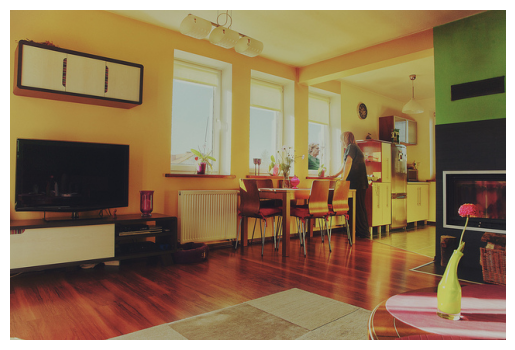

In [35]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.grid(visible=False)
plt.axis('off')
plt.show()

In [36]:
import ast

bbox = ast.literal_eval(selected['bbox'])
bbox

([64, [236.98, 142.51, 24.7, 69.5]],
 [72, [7.03, 167.76, 149.32, 94.87]],
 [72, [557.21, 209.19, 81.35, 78.73]],
 [62, [358.98, 218.05, 56.0, 102.83]],
 [62, [290.69, 218.0, 61.83, 98.48]],
 [62, [413.2, 223.01, 30.17, 81.36]],
 [62, [317.4, 219.24, 21.58, 11.59]],
 [1, [412.8, 157.61, 53.05, 138.01]],
 [1, [384.43, 172.21, 15.12, 35.74]],
 [78, [512.22, 205.75, 14.74, 15.97]],
 [82, [493.1, 174.34, 20.29, 108.31]],
 [84, [604.77, 305.89, 14.34, 45.71]],
 [84, [613.24, 308.24, 12.88, 46.44]],
 [85, [447.77, 121.12, 13.97, 21.88]],
 [86, [549.06, 309.43, 36.68, 89.67]],
 [86, [350.76, 208.84, 11.37, 22.55]],
 [62, [412.25, 219.02, 9.63, 12.52]],
 [86, [241.24, 194.99, 14.22, 17.63]],
 [86, [336.79, 199.5, 9.73, 16.73]],
 [67, [321.21, 231.22, 125.56, 88.93]],
 [98, [0.0, 38.0, 549.0, 297.0]],
 [102, [136.0, 0.0, 473.0, 116.0]],
 [105, [444.0, 226.0, 20.0, 11.0]],
 [118, [0.0, 269.0, 564.0, 157.0]],
 [119, [338.0, 166.0, 29.0, 50.0]],
 [123, [292.0, 246.0, 348.0, 111.0]],
 [130, [212.0,

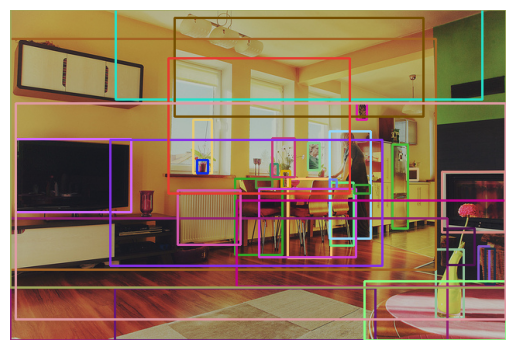

In [37]:
img = cv2.imread(os.path.join(img_path, selected['file_name']))
for i in bbox:
    color = [random.randint(0, 255) for _ in range(3)]
    x, y, w, h = i[1]
    x, y, w, h = int(x), int(y), int(w), int(h)
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.grid(visible=False)
plt.axis('off')
plt.show()

In [38]:
df_total_catego[df_total_catego['name'] == "tv"]
for i in bbox:
    print(df_total_catego[df_total_catego['id'] == int(i[0])].values)

[['furniture' 64 'potted plant']]
[['electronic' 72 'tv']]
[['electronic' 72 'tv']]
[['furniture' 62 'chair']]
[['furniture' 62 'chair']]
[['furniture' 62 'chair']]
[['furniture' 62 'chair']]
[['person' 1 'person']]
[['person' 1 'person']]
[['appliance' 78 'microwave']]
[['appliance' 82 'refrigerator']]
[['indoor' 84 'book']]
[['indoor' 84 'book']]
[['indoor' 85 'clock']]
[['indoor' 86 'vase']]
[['indoor' 86 'vase']]
[['furniture' 62 'chair']]
[['indoor' 86 'vase']]
[['indoor' 86 'vase']]
[['furniture' 67 'dining table']]
[['furniture-stuff' 98 'cabinet']]
[['ceiling' 102 'ceiling-other']]
[['textile' 105 'clothes']]
[['floor' 118 'floor-wood']]
[['plant' 119 'flower']]
[['furniture-stuff' 123 'furniture-other']]
[['furniture-stuff' 130 'light']]
[['raw-material' 132 'metal']]
[['plant' 142 'plant-other']]
[['textile' 152 'rug']]
[['furniture-stuff' 156 'shelf']]
[['furniture-stuff' 165 'table']]
[['wall' 172 'wall-concrete']]
[['window' 181 'window-other']]
[['other' 183 'other']]


In [39]:
segmentation = ast.literal_eval(selected['segmentation'])
segmentation

([[240.86,
   211.31,
   240.16,
   197.19,
   236.98,
   192.26,
   237.34,
   187.67,
   245.8,
   188.02,
   243.33,
   176.02,
   250.39,
   186.96,
   251.8,
   166.85,
   255.33,
   142.51,
   253.21,
   190.49,
   261.68,
   183.08,
   258.86,
   191.2,
   260.98,
   206.37,
   254.63,
   199.66,
   252.51,
   201.78,
   251.8,
   212.01]],
 [[9.66, 167.76, 156.35, 173.04, 153.71, 256.48, 82.56, 262.63, 7.03, 260.87]],
 [[563.33, 209.19, 637.69, 209.19, 638.56, 287.92, 557.21, 280.04]],
 [[368.16,
   252.94,
   383.77,
   255.69,
   384.69,
   235.49,
   389.28,
   226.31,
   392.03,
   219.89,
   413.15,
   218.05,
   411.31,
   241.92,
   411.31,
   256.61,
   412.23,
   274.05,
   414.98,
   301.6,
   414.98,
   316.29,
   412.23,
   311.7,
   406.72,
   290.58,
   405.8,
   270.38,
   389.28,
   270.38,
   381.01,
   270.38,
   383.77,
   319.04,
   377.34,
   320.88,
   377.34,
   273.14,
   358.98,
   266.71,
   358.98,
   253.86,
   370.91,
   253.86]],
 [[319.32,
   230.

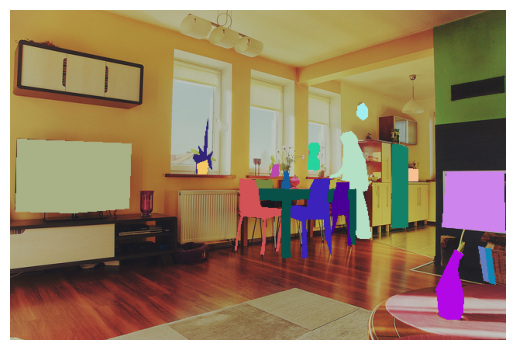

In [40]:
img = cv2.imread(os.path.join(img_path, selected['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
alpha = 0.5

overlay = img.copy()
for seg_data in segmentation:
    color = [random.randint(0, 255) for _ in range(3)]
    if isinstance(seg_data, list):
        # Handle polygon format (list of coordinates)
        for poly in seg_data:
            # Convert list of floats to a numpy array of integers, reshaped to (N, 1, 2)
            points = np.array(poly).reshape((-1, 1, 2)).astype(int)
            # Fill the polygon on the overlay
            cv2.fillPoly(overlay, [points], color)
    # elif isinstance(seg_data, dict) and 'counts' in seg_data:
    #     # Handle RLE format (dictionary with 'size' and 'counts')
    #     rle = seg_data
    #     # Decode RLE to a binary mask
    #     binary_mask = maskUtils.decode(rle)
    #     # Expand mask to 3 channels to apply color
    #     color_mask = np.zeros_like(overlay, dtype=np.uint8)
    #     color_mask[binary_mask == 1] = color
    #     # Add the RLE mask to the overlay
    #     overlay = cv2.addWeighted(overlay, 1, color_mask, 1, 0)

# img = cv2.addWeighted(img, 1 - alpha, overlay, alpha, 0)
img.shape

plt.imshow(overlay)
plt.grid(visible=False)
plt.axis('off')
plt.show()

In [41]:
test_df = pd.read_parquet('results.parquet')
test_df

,file_name,height,width,id,segmentation,bbox,category_id
0,000000000139.jpg,426,640,139,"[[[240.86, 211.31, 240.16, 197.19, 236.98, 192...","[[236.98, 142.51, 24.7, 69.5], [7.03, 167.76, ...","[64, 72, 72, 62, 62, 62, 62, 1, 1, 78, 82, 84,..."
1,000000000285.jpg,640,586,285,"[[[37.31, 373.02, 57.4, 216.61, 67.44, 159.21,...","[[1.43, 68.81, 584.57, 563.94], [0.0, 0.0, 586...","[23, 124, 183]"
2,000000000632.jpg,483,640,632,"[[[5.45, 269.03, 25.08, 273.39, 44.7, 289.75, ...","[[3.27, 266.85, 401.23, 208.25], [183.36, 136....","[65, 64, 84, 84, 84, 84, 84, 62, 64, 84, 84, 8..."
3,000000000724.jpg,500,375,724,"[[[122.51, 174.51, 120.07, 110.94, 159.68, 71....","[[120.07, 71.83, 134.49, 153.08], [123.39, 279...","[13, 8, 3, 13, 97, 111, 149, 157, 183]"
4,000000000776.jpg,640,428,776,"[[[2.88, 129.73, 15.86, 109.55, 25.95, 102.34,...","[[1.44, 56.22, 344.51, 471.35], [2.88, 278.2, ...","[88, 88, 88, 65, 167, 183]"
...,...,...,...,...,...,...,...
4995,000000581317.jpg,354,640,581317,"[[[413.66, 163.89, 406.82, 147.7, 407.96, 143....","[[406.82, 142.23, 21.43, 36.25], [409.85, 55.9...","[77, 1, 97, 124, 135, 157, 183]"
4996,000000581357.jpg,612,612,581357,"[[[270.93, 314.71, 269.56, 239.07, 290.18, 221...","[[262.68, 93.29, 220.04, 247.55], [428.92, 400...","[1, 1, 1, 1, 1, 1, 41, 15, 1, 1, 1, 1, 15, 1, ..."
4997,000000581482.jpg,427,640,581482,"[[[404.93, 263.72, 407.81, 236.85, 410.69, 226...","[[404.93, 205.18, 103.63, 100.76], [517.31, 21...","[85, 85, 102, 130, 172, 181, 183]"
4998,000000581615.jpg,640,478,581615,"[[[222.04, 621.13, 162.54, 568.89, 145.12, 497...","[[139.32, 386.03, 191.56, 235.1], [0.0, 0.0, 4...","[70, 123, 132, 176, 183]"
